In [63]:

import imagine as im
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pingouin as pg
from imagine.funpair_corr_analysis import *


In [64]:
data_dir = im.config.PROCESSED_DATA_DIR

# ebicGlasso based network
vv_centrality_eg_human = pd.read_csv(data_dir/"bt_sp_eg_centrality_vviq_humans.csv")
vv_centrality_eg_llm = pd.read_csv(data_dir/"bt_sp_eg_centrality_vviq_models.csv")

ps_centrality_eg_human = pd.read_csv(data_dir/"bt_sp_eg_centrality_psiq_humans.csv")
ps_centrality_eg_llm = pd.read_csv(data_dir/"bt_sp_eg_centrality_psiq_models.csv")




In [65]:
# Centrality Analysis
centrality_measures = ['Betweenness', 'Closeness', 'Strength', 'ExpectedInfluence']
vv_centrality_eg = pd.concat([vv_centrality_eg_human,vv_centrality_eg_llm])
ps_centrality_eg = pd.concat([ps_centrality_eg_human,ps_centrality_eg_llm])
vv_centrality_eg["groupmodel"] = vv_centrality_eg["group"]+"_"+vv_centrality_eg["model"]
ps_centrality_eg["groupmodel"] = ps_centrality_eg["group"]+"_"+ps_centrality_eg["model"]
fig_out_dir = im.config.FIGURES_DIR /"svg"/ "network_analysis"
if not fig_out_dir.exists():
    fig_out_dir.mkdir(parents=True)
# Refactored: use functional helpers from imagine.funpair_corr_analysis to compute, plot, and run assumption checks


In [66]:
# Group orderings used across analyses
vv_groups = ['fl_human','pl1_human', 'pl2_human','pl_human', 'plfl_human',
'independent_g12','independent_g12qt', 'independent_g27', 'independent_g27qt','independent_ll70', 'independent_llsc', 
'cumulative_g12','cumulative_g12qt', 'cumulative_g27', 'cumulative_g27qt','cumulative_ll70', 'cumulative_llsc']

ps_groups =['fl_human','uk_human','ukfl_human','independent_g12', 'independent_g12qt', 'independent_g27',
       'independent_g27qt', 'independent_ll70', 'independent_llsc','cumulative_g12', 'cumulative_g12qt', 'cumulative_g27',
       'cumulative_g27qt', 'cumulative_ll70', 'cumulative_llsc']

label_map = {
    'fl_human': 'Florida',
    'pl1_human': 'Poland 1',
    'pl2_human': 'Poland 2',
    'pl_human': 'Poland All',
    'plfl_human': 'Flodia+Poland',
    'independent_g12': 'i_Gemma3:12b',
    'independent_g12qt': 'i_Gemma3:12b-QAT',
    'independent_g27': 'i_Gemma3:27b',
    'independent_g27qt': 'i_Gemma3:27b-QAT',
    'independent_llsc': 'i_Llama4:16x17b',
    'independent_ll70': 'i_Llama3.3:70b',
    'cumulative_g12': 'c_Gemma3:12b',
    'cumulative_g12qt': 'c_Gemma3:12b-QAT',
    'cumulative_g27': 'c_Gemma3:27b',
    'cumulative_g27qt': 'c_Gemma3:27b-QAT',
    'cumulative_llsc': 'c_Llama4:16x17b',
    'cumulative_ll70': 'c_Llama3.3:70b',
    'uk_human':'London',
    'ukfl_human':'Florida+London'    
    # add remaining mappings as needed
}

# Containers to hold results
vv_plot_results = {}
ps_plot_results = {}

# Helper to save pivot tables with consistent names
def _save_pivot(prefix, measure, pivot):
    short = measure.replace(' ', '_').lower()
    fname = data_dir / f"{prefix}{short}_p.csv"
    pivot.to_csv(fname)
    return fname

In [67]:
padjust = 'fdr_bh'
corr_method = "pearson"
measures = ['ExpectedInfluence', 'Strength', 'Closeness', 'Betweenness']
hypothesis = 'greater' # gereater correlation for greater similarity in importance of node.


In [68]:
vv_centrality_eg

,graph,type,node,measure,value,task,group,model,groupmodel
0,graph 1,NaN,A_1,Betweenness,3.000000,vviq,fl,human,fl_human
1,graph 1,NaN,A_2,Betweenness,11.000000,vviq,fl,human,fl_human
2,graph 1,NaN,A_3,Betweenness,22.000000,vviq,fl,human,fl_human
3,graph 1,NaN,A_4,Betweenness,27.000000,vviq,fl,human,fl_human
4,graph 1,NaN,B_1,Betweenness,13.000000,vviq,fl,human,fl_human
...,...,...,...,...,...,...,...,...,...
1531,graph 1,NaN,G_4,ExpectedInfluence,0.840655,vviq,cumulative,llsc,cumulative_llsc
1532,graph 1,NaN,H_1,ExpectedInfluence,0.873421,vviq,cumulative,llsc,cumulative_llsc
1533,graph 1,NaN,H_2,ExpectedInfluence,0.962754,vviq,cumulative,llsc,cumulative_llsc
1534,graph 1,NaN,H_3,ExpectedInfluence,0.945908,vviq,cumulative,llsc,cumulative_llsc


In [69]:
vv_plot_results

{}

--xx-- /Users/saurabh.ranjan/Library/CloudStorage/OneDrive-UniversityofFlorida/2020_2025_reality_monitoring_dissertation/osf-imagine/imagine_world_model/reports/figures/svg/network_analysis/vv_centrality_eg__expectedinfluence_annot.svg


/Users/saurabh.ranjan/Library/CloudStorage/OneDrive-UniversityofFlorida/2020_2025_reality_monitoring_dissertation/osf-imagine/imagine_world_model/imagine/funpair_corr_analysis.py:237: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  n_plus = annot_df.applymap(lambda s: isinstance(s, str) and s.startswith("+")).sum().sum()
/Users/saurabh.ranjan/Library/CloudStorage/OneDrive-UniversityofFlorida/2020_2025_reality_monitoring_dissertation/osf-imagine/imagine_world_model/imagine/funpair_corr_analysis.py:238: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  n_star = annot_df.applymap(lambda s: isinstance(s, str) and s.startswith("*")).sum().sum()


----xxxx---- /Users/saurabh.ranjan/Library/CloudStorage/OneDrive-UniversityofFlorida/2020_2025_reality_monitoring_dissertation/osf-imagine/imagine_world_model/reports/figures/svg/network_analysis/vv_centrality_eg__expectedinfluence_annot.svg


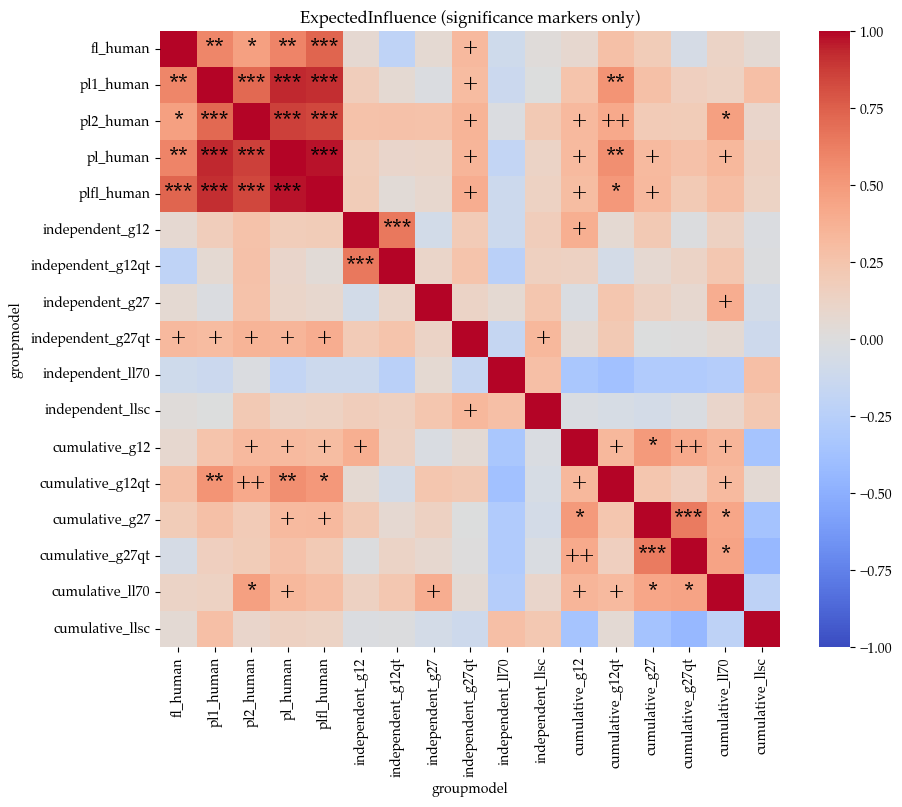

Saved assumption check + spearman results to: /Users/saurabh.ranjan/Library/CloudStorage/OneDrive-UniversityofFlorida/2020_2025_reality_monitoring_dissertation/osf-imagine/imagine_world_model/data/processed/assumption_checks_vv_expectedinfluence.csv
--xx-- /Users/saurabh.ranjan/Library/CloudStorage/OneDrive-UniversityofFlorida/2020_2025_reality_monitoring_dissertation/osf-imagine/imagine_world_model/reports/figures/svg/network_analysis/vv_centrality_eg__strength_annot.svg


/Users/saurabh.ranjan/Library/CloudStorage/OneDrive-UniversityofFlorida/2020_2025_reality_monitoring_dissertation/osf-imagine/imagine_world_model/imagine/funpair_corr_analysis.py:237: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  n_plus = annot_df.applymap(lambda s: isinstance(s, str) and s.startswith("+")).sum().sum()
/Users/saurabh.ranjan/Library/CloudStorage/OneDrive-UniversityofFlorida/2020_2025_reality_monitoring_dissertation/osf-imagine/imagine_world_model/imagine/funpair_corr_analysis.py:238: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  n_star = annot_df.applymap(lambda s: isinstance(s, str) and s.startswith("*")).sum().sum()


----xxxx---- /Users/saurabh.ranjan/Library/CloudStorage/OneDrive-UniversityofFlorida/2020_2025_reality_monitoring_dissertation/osf-imagine/imagine_world_model/reports/figures/svg/network_analysis/vv_centrality_eg__strength_annot.svg


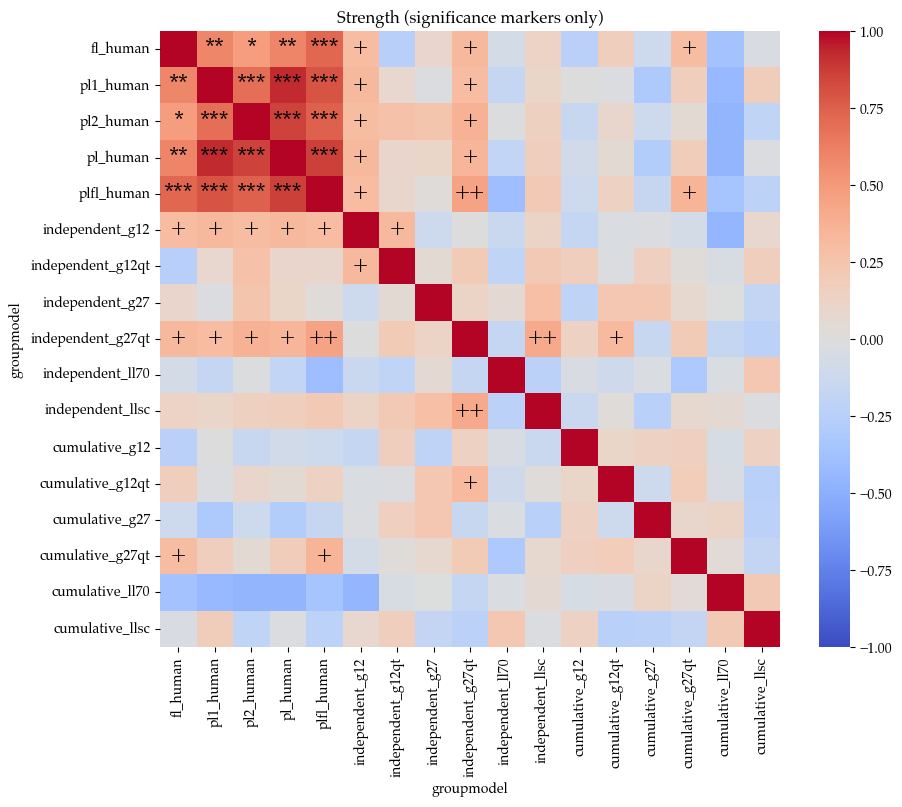

Saved assumption check + spearman results to: /Users/saurabh.ranjan/Library/CloudStorage/OneDrive-UniversityofFlorida/2020_2025_reality_monitoring_dissertation/osf-imagine/imagine_world_model/data/processed/assumption_checks_vv_strength.csv
--xx-- /Users/saurabh.ranjan/Library/CloudStorage/OneDrive-UniversityofFlorida/2020_2025_reality_monitoring_dissertation/osf-imagine/imagine_world_model/reports/figures/svg/network_analysis/vv_centrality_eg__closeness_annot.svg


/Users/saurabh.ranjan/Library/CloudStorage/OneDrive-UniversityofFlorida/2020_2025_reality_monitoring_dissertation/osf-imagine/imagine_world_model/imagine/funpair_corr_analysis.py:237: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  n_plus = annot_df.applymap(lambda s: isinstance(s, str) and s.startswith("+")).sum().sum()
/Users/saurabh.ranjan/Library/CloudStorage/OneDrive-UniversityofFlorida/2020_2025_reality_monitoring_dissertation/osf-imagine/imagine_world_model/imagine/funpair_corr_analysis.py:238: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  n_star = annot_df.applymap(lambda s: isinstance(s, str) and s.startswith("*")).sum().sum()


----xxxx---- /Users/saurabh.ranjan/Library/CloudStorage/OneDrive-UniversityofFlorida/2020_2025_reality_monitoring_dissertation/osf-imagine/imagine_world_model/reports/figures/svg/network_analysis/vv_centrality_eg__closeness_annot.svg


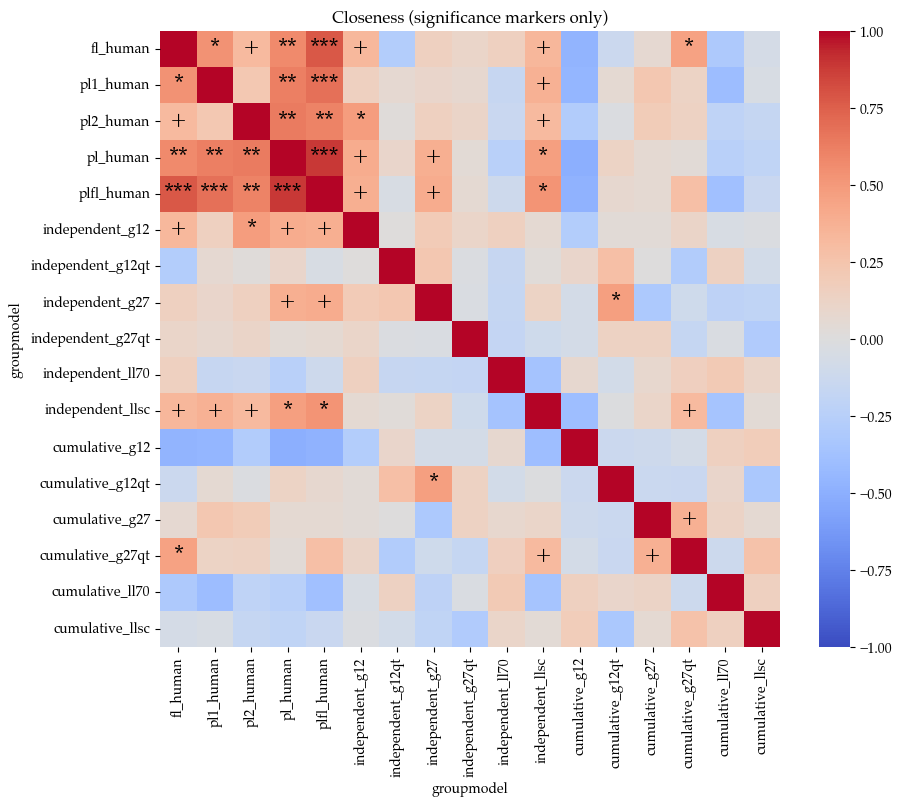

Saved assumption check + spearman results to: /Users/saurabh.ranjan/Library/CloudStorage/OneDrive-UniversityofFlorida/2020_2025_reality_monitoring_dissertation/osf-imagine/imagine_world_model/data/processed/assumption_checks_vv_closeness.csv
--xx-- /Users/saurabh.ranjan/Library/CloudStorage/OneDrive-UniversityofFlorida/2020_2025_reality_monitoring_dissertation/osf-imagine/imagine_world_model/reports/figures/svg/network_analysis/vv_centrality_eg__betweenness_annot.svg


/Users/saurabh.ranjan/Library/CloudStorage/OneDrive-UniversityofFlorida/2020_2025_reality_monitoring_dissertation/osf-imagine/imagine_world_model/imagine/funpair_corr_analysis.py:237: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  n_plus = annot_df.applymap(lambda s: isinstance(s, str) and s.startswith("+")).sum().sum()
/Users/saurabh.ranjan/Library/CloudStorage/OneDrive-UniversityofFlorida/2020_2025_reality_monitoring_dissertation/osf-imagine/imagine_world_model/imagine/funpair_corr_analysis.py:238: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  n_star = annot_df.applymap(lambda s: isinstance(s, str) and s.startswith("*")).sum().sum()


----xxxx---- /Users/saurabh.ranjan/Library/CloudStorage/OneDrive-UniversityofFlorida/2020_2025_reality_monitoring_dissertation/osf-imagine/imagine_world_model/reports/figures/svg/network_analysis/vv_centrality_eg__betweenness_annot.svg


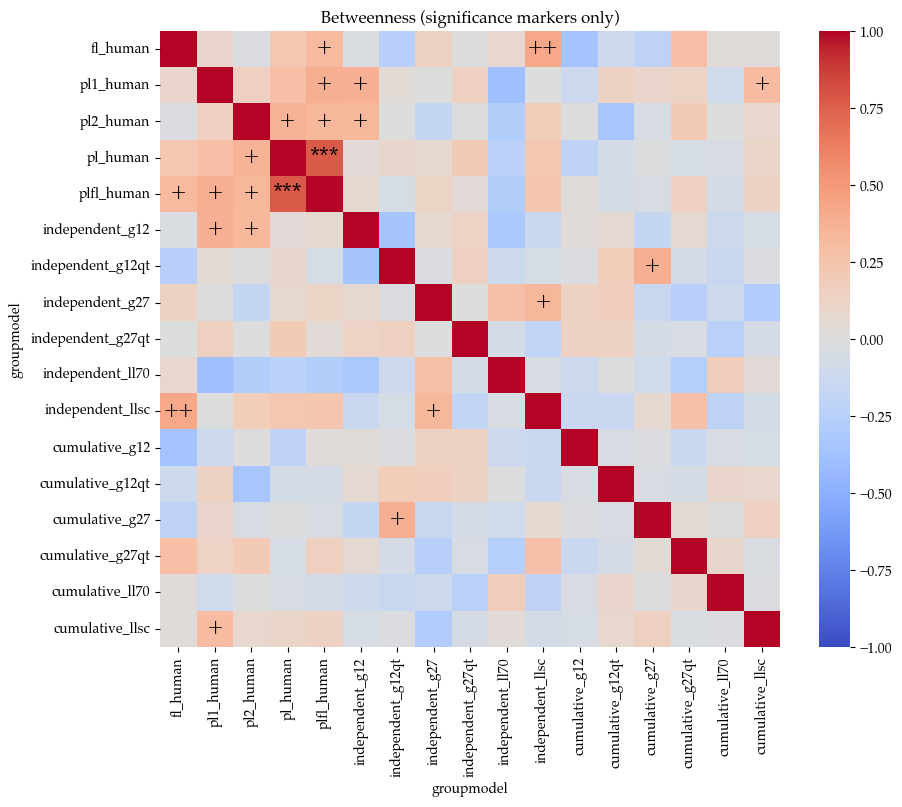

Saved assumption check + spearman results to: /Users/saurabh.ranjan/Library/CloudStorage/OneDrive-UniversityofFlorida/2020_2025_reality_monitoring_dissertation/osf-imagine/imagine_world_model/data/processed/assumption_checks_vv_betweenness.csv
--xx-- /Users/saurabh.ranjan/Library/CloudStorage/OneDrive-UniversityofFlorida/2020_2025_reality_monitoring_dissertation/osf-imagine/imagine_world_model/reports/figures/svg/network_analysis/ps_centrality_eg__expectedinfluence_annot.svg


/Users/saurabh.ranjan/Library/CloudStorage/OneDrive-UniversityofFlorida/2020_2025_reality_monitoring_dissertation/osf-imagine/imagine_world_model/imagine/funpair_corr_analysis.py:237: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  n_plus = annot_df.applymap(lambda s: isinstance(s, str) and s.startswith("+")).sum().sum()
/Users/saurabh.ranjan/Library/CloudStorage/OneDrive-UniversityofFlorida/2020_2025_reality_monitoring_dissertation/osf-imagine/imagine_world_model/imagine/funpair_corr_analysis.py:238: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  n_star = annot_df.applymap(lambda s: isinstance(s, str) and s.startswith("*")).sum().sum()


----xxxx---- /Users/saurabh.ranjan/Library/CloudStorage/OneDrive-UniversityofFlorida/2020_2025_reality_monitoring_dissertation/osf-imagine/imagine_world_model/reports/figures/svg/network_analysis/ps_centrality_eg__expectedinfluence_annot.svg


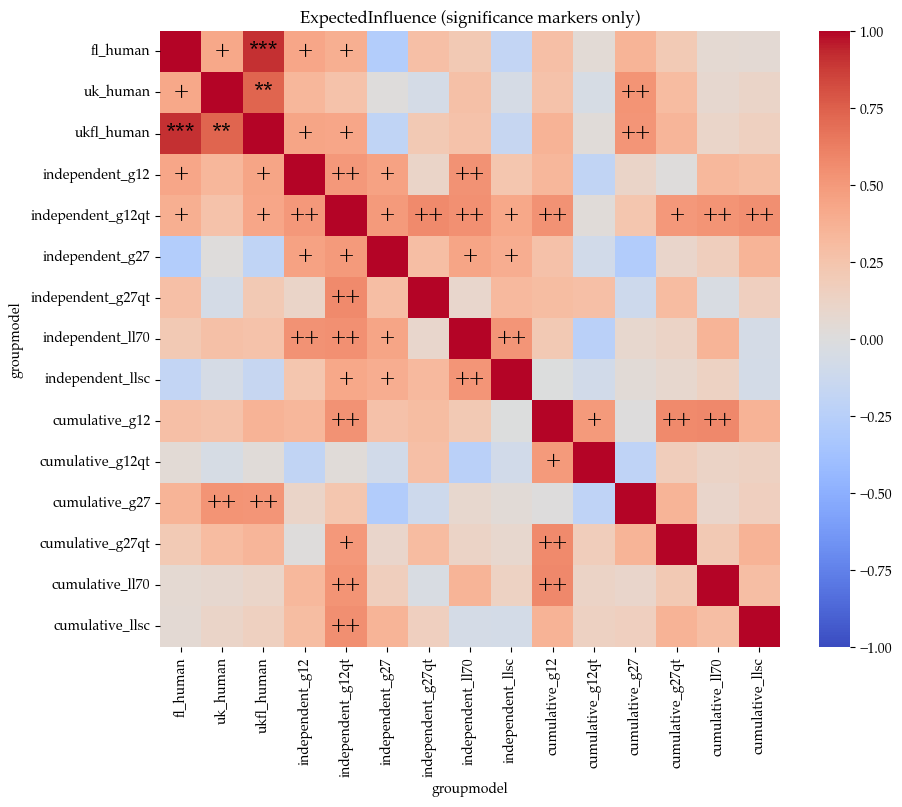

Saved assumption check + spearman results to: /Users/saurabh.ranjan/Library/CloudStorage/OneDrive-UniversityofFlorida/2020_2025_reality_monitoring_dissertation/osf-imagine/imagine_world_model/data/processed/assumption_checks_ps_expectedinfluence.csv
--xx-- /Users/saurabh.ranjan/Library/CloudStorage/OneDrive-UniversityofFlorida/2020_2025_reality_monitoring_dissertation/osf-imagine/imagine_world_model/reports/figures/svg/network_analysis/ps_centrality_eg__strength_annot.svg


/Users/saurabh.ranjan/Library/CloudStorage/OneDrive-UniversityofFlorida/2020_2025_reality_monitoring_dissertation/osf-imagine/imagine_world_model/imagine/funpair_corr_analysis.py:237: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  n_plus = annot_df.applymap(lambda s: isinstance(s, str) and s.startswith("+")).sum().sum()
/Users/saurabh.ranjan/Library/CloudStorage/OneDrive-UniversityofFlorida/2020_2025_reality_monitoring_dissertation/osf-imagine/imagine_world_model/imagine/funpair_corr_analysis.py:238: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  n_star = annot_df.applymap(lambda s: isinstance(s, str) and s.startswith("*")).sum().sum()


----xxxx---- /Users/saurabh.ranjan/Library/CloudStorage/OneDrive-UniversityofFlorida/2020_2025_reality_monitoring_dissertation/osf-imagine/imagine_world_model/reports/figures/svg/network_analysis/ps_centrality_eg__strength_annot.svg


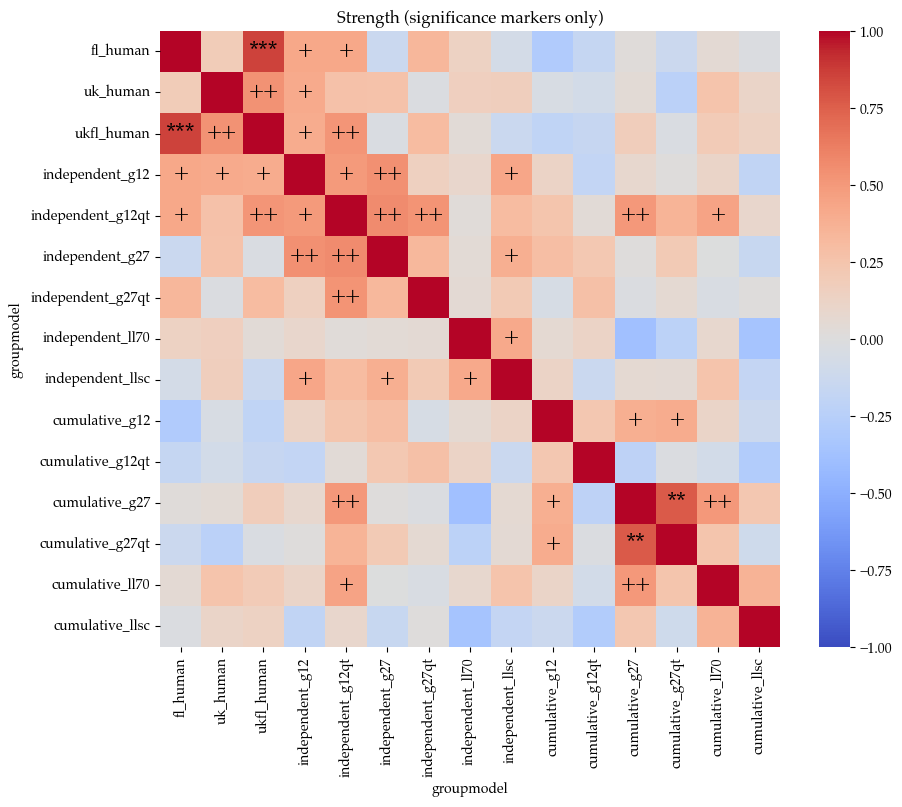

Saved assumption check + spearman results to: /Users/saurabh.ranjan/Library/CloudStorage/OneDrive-UniversityofFlorida/2020_2025_reality_monitoring_dissertation/osf-imagine/imagine_world_model/data/processed/assumption_checks_ps_strength.csv
--xx-- /Users/saurabh.ranjan/Library/CloudStorage/OneDrive-UniversityofFlorida/2020_2025_reality_monitoring_dissertation/osf-imagine/imagine_world_model/reports/figures/svg/network_analysis/ps_centrality_eg__closeness_annot.svg


/Users/saurabh.ranjan/Library/CloudStorage/OneDrive-UniversityofFlorida/2020_2025_reality_monitoring_dissertation/osf-imagine/imagine_world_model/imagine/funpair_corr_analysis.py:237: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  n_plus = annot_df.applymap(lambda s: isinstance(s, str) and s.startswith("+")).sum().sum()
/Users/saurabh.ranjan/Library/CloudStorage/OneDrive-UniversityofFlorida/2020_2025_reality_monitoring_dissertation/osf-imagine/imagine_world_model/imagine/funpair_corr_analysis.py:238: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  n_star = annot_df.applymap(lambda s: isinstance(s, str) and s.startswith("*")).sum().sum()


----xxxx---- /Users/saurabh.ranjan/Library/CloudStorage/OneDrive-UniversityofFlorida/2020_2025_reality_monitoring_dissertation/osf-imagine/imagine_world_model/reports/figures/svg/network_analysis/ps_centrality_eg__closeness_annot.svg


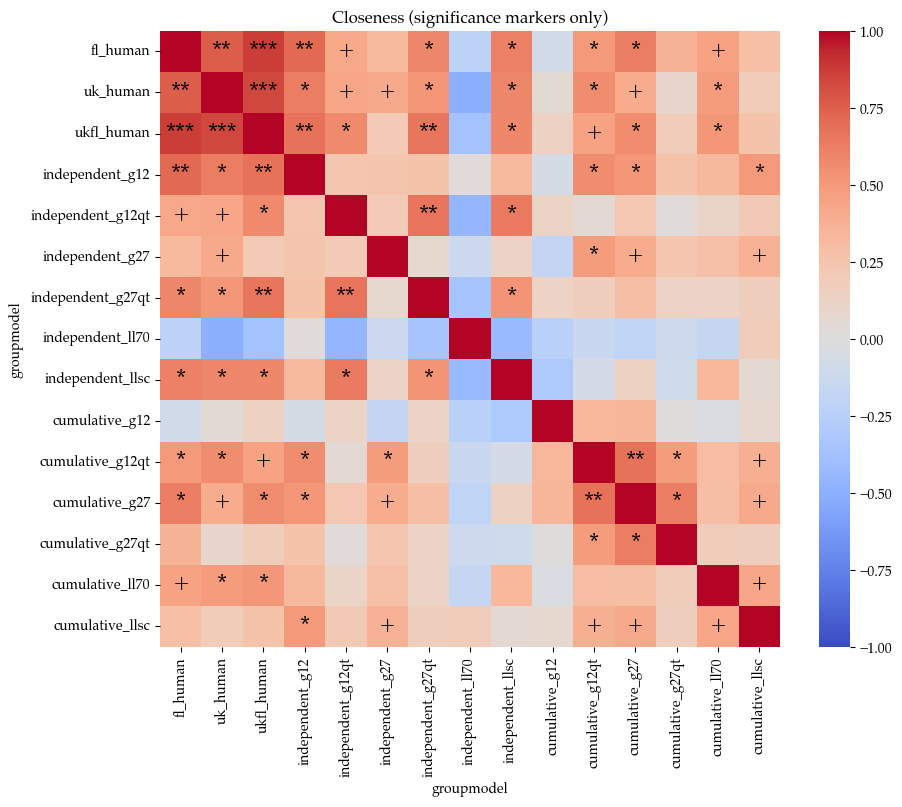

Saved assumption check + spearman results to: /Users/saurabh.ranjan/Library/CloudStorage/OneDrive-UniversityofFlorida/2020_2025_reality_monitoring_dissertation/osf-imagine/imagine_world_model/data/processed/assumption_checks_ps_closeness.csv
--xx-- /Users/saurabh.ranjan/Library/CloudStorage/OneDrive-UniversityofFlorida/2020_2025_reality_monitoring_dissertation/osf-imagine/imagine_world_model/reports/figures/svg/network_analysis/ps_centrality_eg__betweenness_annot.svg


/Users/saurabh.ranjan/Library/CloudStorage/OneDrive-UniversityofFlorida/2020_2025_reality_monitoring_dissertation/osf-imagine/imagine_world_model/imagine/funpair_corr_analysis.py:237: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  n_plus = annot_df.applymap(lambda s: isinstance(s, str) and s.startswith("+")).sum().sum()
/Users/saurabh.ranjan/Library/CloudStorage/OneDrive-UniversityofFlorida/2020_2025_reality_monitoring_dissertation/osf-imagine/imagine_world_model/imagine/funpair_corr_analysis.py:238: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  n_star = annot_df.applymap(lambda s: isinstance(s, str) and s.startswith("*")).sum().sum()


----xxxx---- /Users/saurabh.ranjan/Library/CloudStorage/OneDrive-UniversityofFlorida/2020_2025_reality_monitoring_dissertation/osf-imagine/imagine_world_model/reports/figures/svg/network_analysis/ps_centrality_eg__betweenness_annot.svg


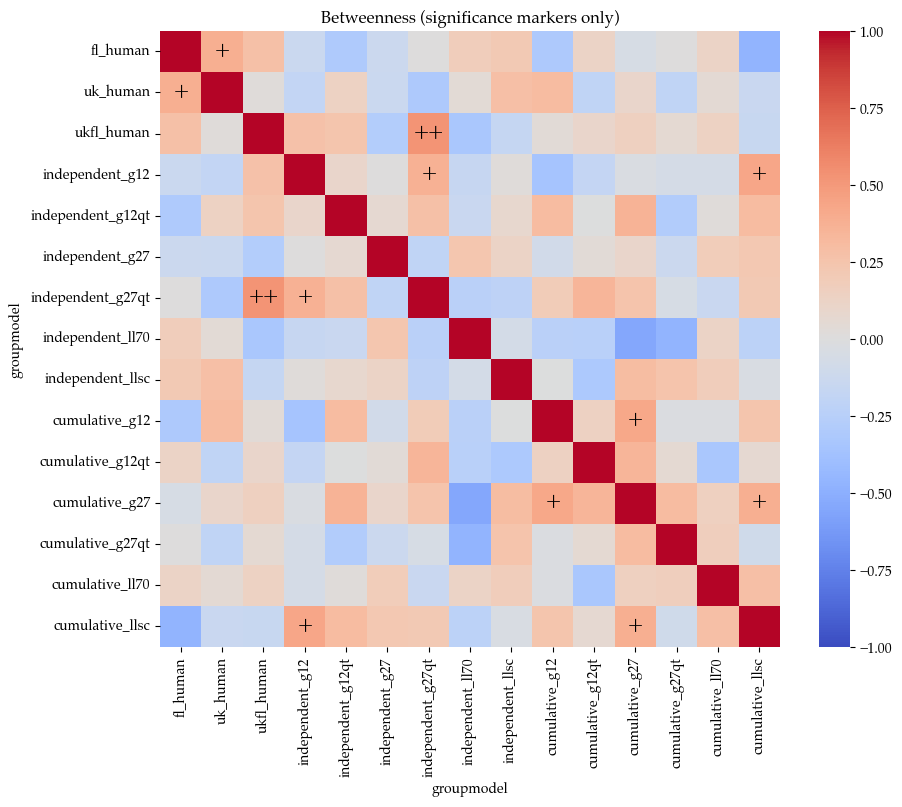

Saved assumption check + spearman results to: /Users/saurabh.ranjan/Library/CloudStorage/OneDrive-UniversityofFlorida/2020_2025_reality_monitoring_dissertation/osf-imagine/imagine_world_model/data/processed/assumption_checks_ps_betweenness.csv
Finished plotting all centrality measures and wrote per-measure assumption CSVs. Results stored in `vv_plot_results` and `ps_plot_results`.


In [70]:
# Run VVIQ measures (compute, plot, and write per-measure assumption CSV via module)
for measure in measures:
    res = analyze_measure(vv_centrality_eg, measure, vv_groups,  "vv_centrality_eg_",fig_out_dir, padjust=padjust, corr_method=corr_method,hypothesis=hypothesis)
    vv_plot_results[measure] = res
    # save pivot in the same style as original code
    _save_pivot('vv_centrality_eg_', measure, res['pivot'])
    # run assumption analysis for this single measure (module will write CSV to data_dir)
    analyze_pairwise_assumptions({measure: res['pivot']}, label_prefix='vv', out_dir=data_dir, padjust=padjust)

# Run PSIQ measures (compute, plot, and write per-measure assumption CSV via module)
for measure in measures:
    res = analyze_measure(ps_centrality_eg, measure, ps_groups, "ps_centrality_eg_",fig_out_dir, padjust=padjust, corr_method=corr_method,hypothesis=hypothesis)
    ps_plot_results[measure] = res
    _save_pivot('ps_centrality_eg_', measure, res['pivot'])
    analyze_pairwise_assumptions({measure: res['pivot']}, label_prefix='ps', out_dir=data_dir, padjust=padjust)

print('Finished plotting all centrality measures and wrote per-measure assumption CSVs. Results stored in `vv_plot_results` and `ps_plot_results`.')


--xx-- /Users/saurabh.ranjan/Library/CloudStorage/OneDrive-UniversityofFlorida/2020_2025_reality_monitoring_dissertation/osf-imagine/imagine_world_model/reports/figures/svg/network_analysis/vv_centrality_eg__expectedinfluence_annot.svg


/Users/saurabh.ranjan/Library/CloudStorage/OneDrive-UniversityofFlorida/2020_2025_reality_monitoring_dissertation/osf-imagine/imagine_world_model/imagine/funpair_corr_analysis.py:237: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  n_plus = annot_df.applymap(lambda s: isinstance(s, str) and s.startswith("+")).sum().sum()
/Users/saurabh.ranjan/Library/CloudStorage/OneDrive-UniversityofFlorida/2020_2025_reality_monitoring_dissertation/osf-imagine/imagine_world_model/imagine/funpair_corr_analysis.py:238: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  n_star = annot_df.applymap(lambda s: isinstance(s, str) and s.startswith("*")).sum().sum()


----xxxx---- /Users/saurabh.ranjan/Library/CloudStorage/OneDrive-UniversityofFlorida/2020_2025_reality_monitoring_dissertation/osf-imagine/imagine_world_model/reports/figures/svg/network_analysis/vv_centrality_eg__expectedinfluence_annot.svg


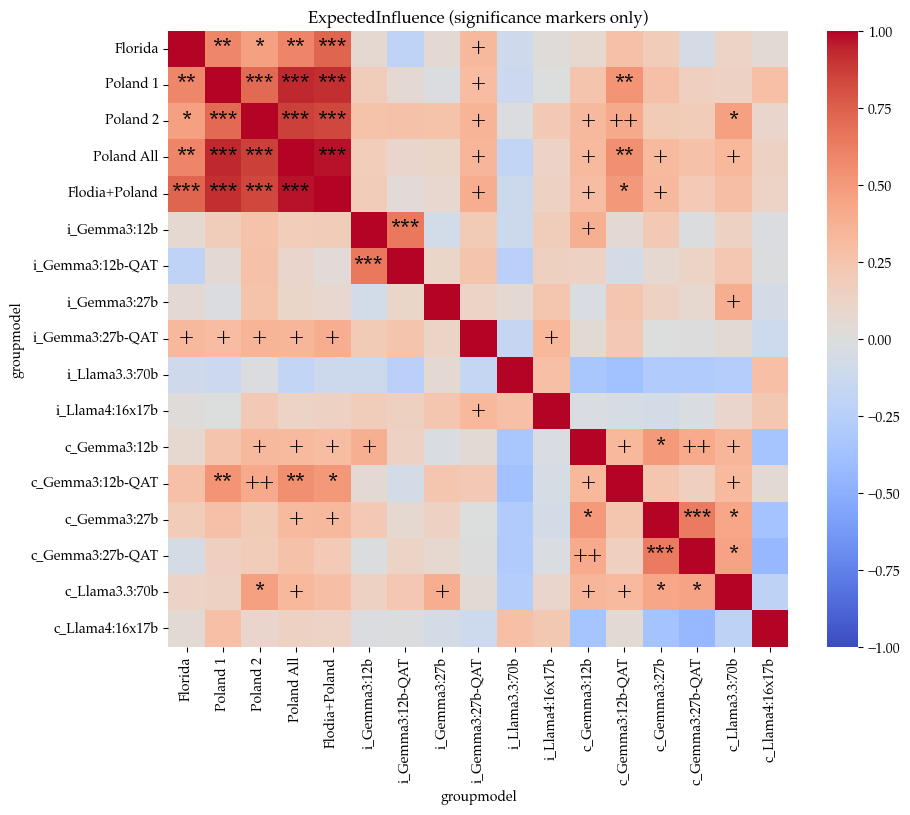

Saved assumption check + spearman results to: /Users/saurabh.ranjan/Library/CloudStorage/OneDrive-UniversityofFlorida/2020_2025_reality_monitoring_dissertation/osf-imagine/imagine_world_model/data/processed/assumption_checks_vv_expectedinfluence.csv
--xx-- /Users/saurabh.ranjan/Library/CloudStorage/OneDrive-UniversityofFlorida/2020_2025_reality_monitoring_dissertation/osf-imagine/imagine_world_model/reports/figures/svg/network_analysis/vv_centrality_eg__strength_annot.svg


/Users/saurabh.ranjan/Library/CloudStorage/OneDrive-UniversityofFlorida/2020_2025_reality_monitoring_dissertation/osf-imagine/imagine_world_model/imagine/funpair_corr_analysis.py:237: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  n_plus = annot_df.applymap(lambda s: isinstance(s, str) and s.startswith("+")).sum().sum()
/Users/saurabh.ranjan/Library/CloudStorage/OneDrive-UniversityofFlorida/2020_2025_reality_monitoring_dissertation/osf-imagine/imagine_world_model/imagine/funpair_corr_analysis.py:238: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  n_star = annot_df.applymap(lambda s: isinstance(s, str) and s.startswith("*")).sum().sum()


----xxxx---- /Users/saurabh.ranjan/Library/CloudStorage/OneDrive-UniversityofFlorida/2020_2025_reality_monitoring_dissertation/osf-imagine/imagine_world_model/reports/figures/svg/network_analysis/vv_centrality_eg__strength_annot.svg


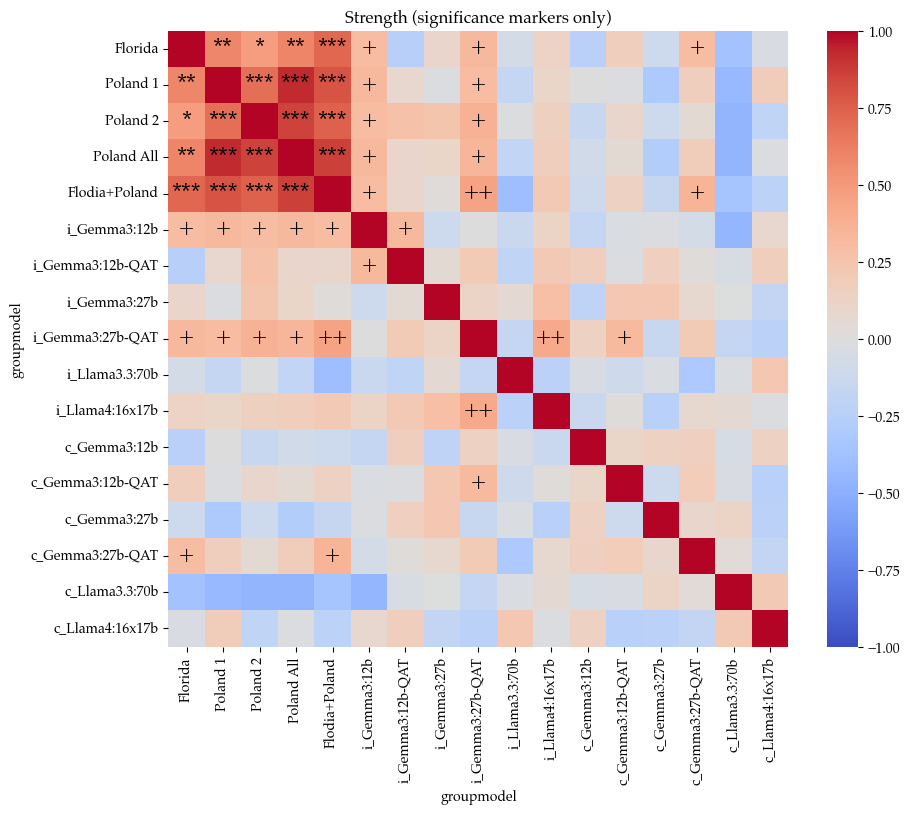

Saved assumption check + spearman results to: /Users/saurabh.ranjan/Library/CloudStorage/OneDrive-UniversityofFlorida/2020_2025_reality_monitoring_dissertation/osf-imagine/imagine_world_model/data/processed/assumption_checks_vv_strength.csv
--xx-- /Users/saurabh.ranjan/Library/CloudStorage/OneDrive-UniversityofFlorida/2020_2025_reality_monitoring_dissertation/osf-imagine/imagine_world_model/reports/figures/svg/network_analysis/vv_centrality_eg__closeness_annot.svg


/Users/saurabh.ranjan/Library/CloudStorage/OneDrive-UniversityofFlorida/2020_2025_reality_monitoring_dissertation/osf-imagine/imagine_world_model/imagine/funpair_corr_analysis.py:237: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  n_plus = annot_df.applymap(lambda s: isinstance(s, str) and s.startswith("+")).sum().sum()
/Users/saurabh.ranjan/Library/CloudStorage/OneDrive-UniversityofFlorida/2020_2025_reality_monitoring_dissertation/osf-imagine/imagine_world_model/imagine/funpair_corr_analysis.py:238: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  n_star = annot_df.applymap(lambda s: isinstance(s, str) and s.startswith("*")).sum().sum()


----xxxx---- /Users/saurabh.ranjan/Library/CloudStorage/OneDrive-UniversityofFlorida/2020_2025_reality_monitoring_dissertation/osf-imagine/imagine_world_model/reports/figures/svg/network_analysis/vv_centrality_eg__closeness_annot.svg


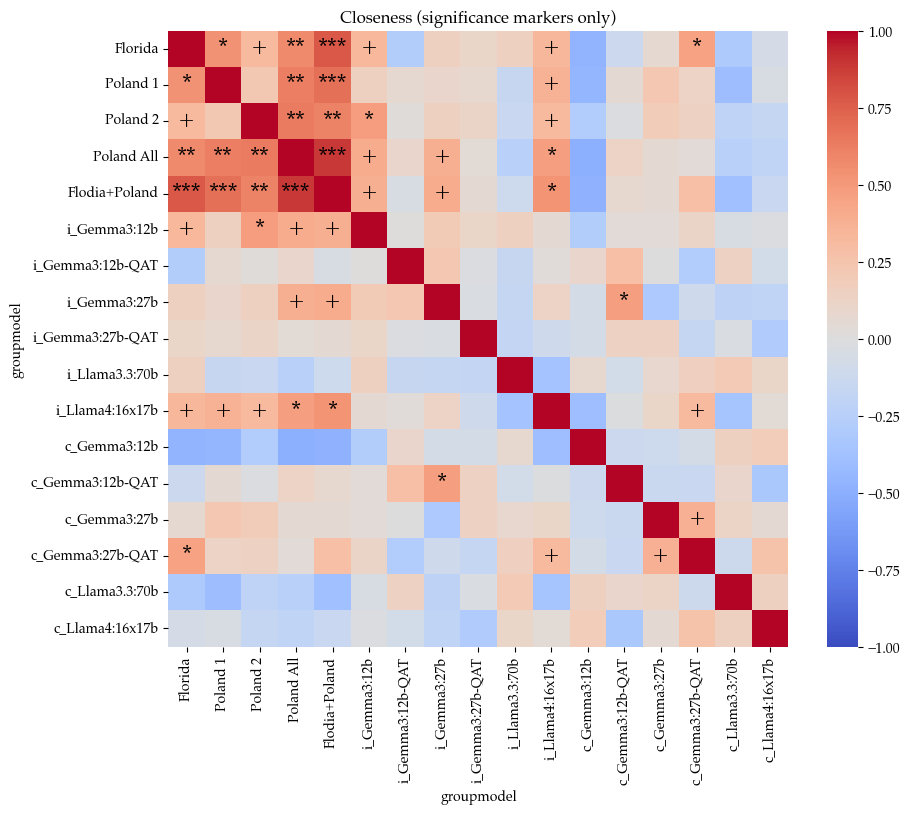

Saved assumption check + spearman results to: /Users/saurabh.ranjan/Library/CloudStorage/OneDrive-UniversityofFlorida/2020_2025_reality_monitoring_dissertation/osf-imagine/imagine_world_model/data/processed/assumption_checks_vv_closeness.csv
--xx-- /Users/saurabh.ranjan/Library/CloudStorage/OneDrive-UniversityofFlorida/2020_2025_reality_monitoring_dissertation/osf-imagine/imagine_world_model/reports/figures/svg/network_analysis/vv_centrality_eg__betweenness_annot.svg


/Users/saurabh.ranjan/Library/CloudStorage/OneDrive-UniversityofFlorida/2020_2025_reality_monitoring_dissertation/osf-imagine/imagine_world_model/imagine/funpair_corr_analysis.py:237: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  n_plus = annot_df.applymap(lambda s: isinstance(s, str) and s.startswith("+")).sum().sum()
/Users/saurabh.ranjan/Library/CloudStorage/OneDrive-UniversityofFlorida/2020_2025_reality_monitoring_dissertation/osf-imagine/imagine_world_model/imagine/funpair_corr_analysis.py:238: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  n_star = annot_df.applymap(lambda s: isinstance(s, str) and s.startswith("*")).sum().sum()


----xxxx---- /Users/saurabh.ranjan/Library/CloudStorage/OneDrive-UniversityofFlorida/2020_2025_reality_monitoring_dissertation/osf-imagine/imagine_world_model/reports/figures/svg/network_analysis/vv_centrality_eg__betweenness_annot.svg


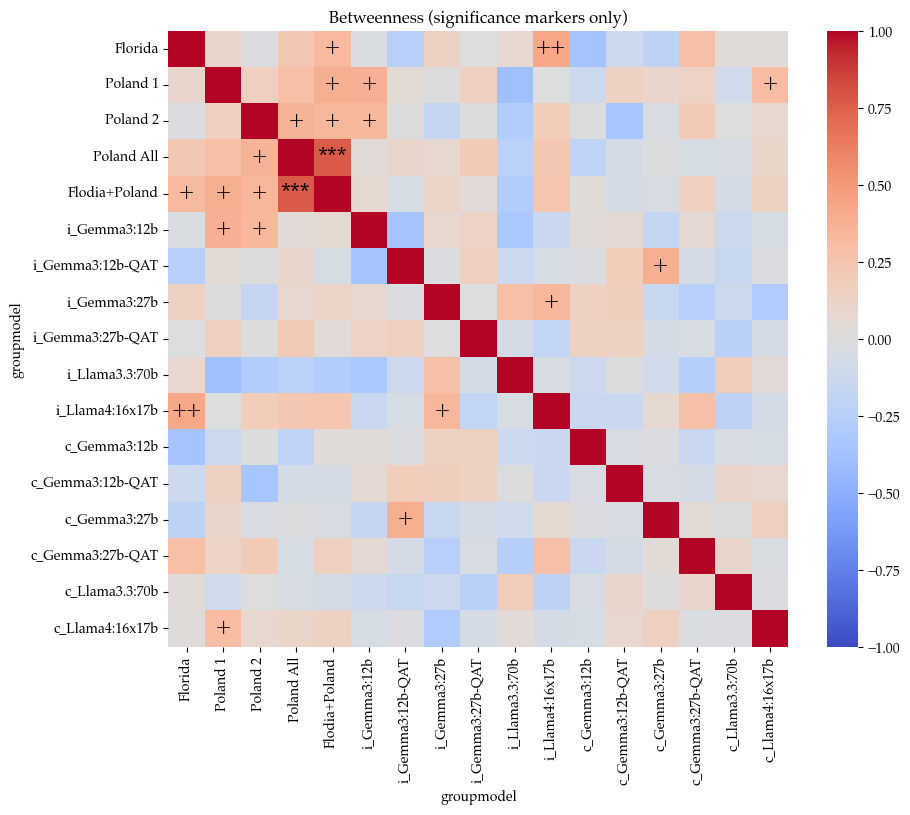

Saved assumption check + spearman results to: /Users/saurabh.ranjan/Library/CloudStorage/OneDrive-UniversityofFlorida/2020_2025_reality_monitoring_dissertation/osf-imagine/imagine_world_model/data/processed/assumption_checks_vv_betweenness.csv
--xx-- /Users/saurabh.ranjan/Library/CloudStorage/OneDrive-UniversityofFlorida/2020_2025_reality_monitoring_dissertation/osf-imagine/imagine_world_model/reports/figures/svg/network_analysis/ps_centrality_eg__expectedinfluence_annot.svg


/Users/saurabh.ranjan/Library/CloudStorage/OneDrive-UniversityofFlorida/2020_2025_reality_monitoring_dissertation/osf-imagine/imagine_world_model/imagine/funpair_corr_analysis.py:237: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  n_plus = annot_df.applymap(lambda s: isinstance(s, str) and s.startswith("+")).sum().sum()
/Users/saurabh.ranjan/Library/CloudStorage/OneDrive-UniversityofFlorida/2020_2025_reality_monitoring_dissertation/osf-imagine/imagine_world_model/imagine/funpair_corr_analysis.py:238: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  n_star = annot_df.applymap(lambda s: isinstance(s, str) and s.startswith("*")).sum().sum()


----xxxx---- /Users/saurabh.ranjan/Library/CloudStorage/OneDrive-UniversityofFlorida/2020_2025_reality_monitoring_dissertation/osf-imagine/imagine_world_model/reports/figures/svg/network_analysis/ps_centrality_eg__expectedinfluence_annot.svg


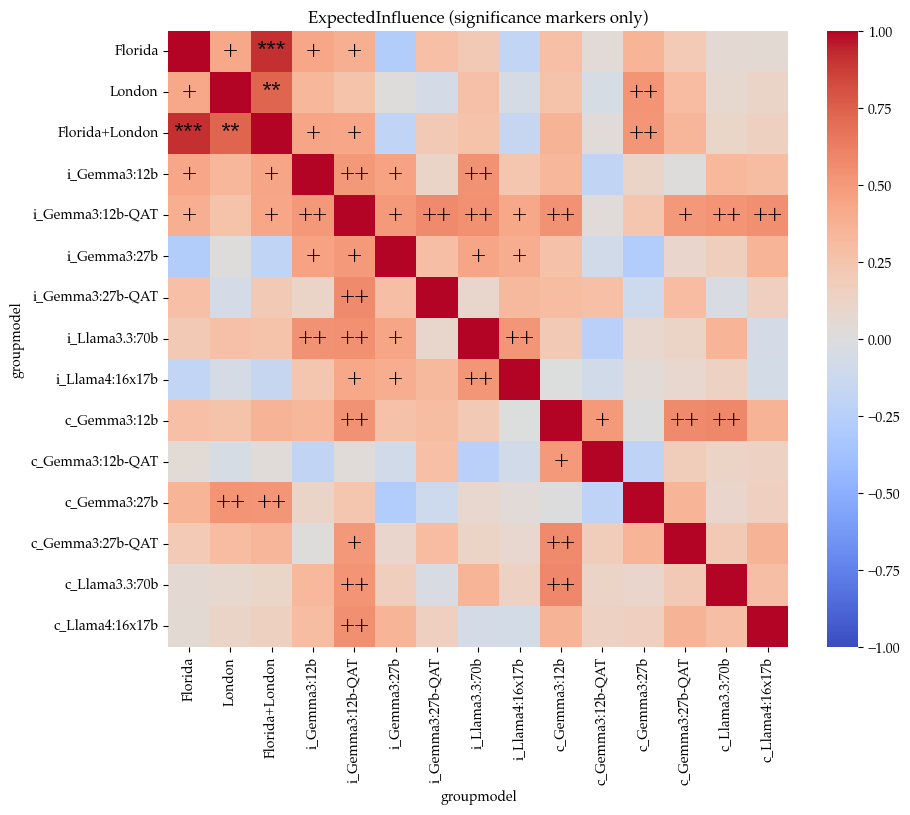

Saved assumption check + spearman results to: /Users/saurabh.ranjan/Library/CloudStorage/OneDrive-UniversityofFlorida/2020_2025_reality_monitoring_dissertation/osf-imagine/imagine_world_model/data/processed/assumption_checks_ps_expectedinfluence.csv
--xx-- /Users/saurabh.ranjan/Library/CloudStorage/OneDrive-UniversityofFlorida/2020_2025_reality_monitoring_dissertation/osf-imagine/imagine_world_model/reports/figures/svg/network_analysis/ps_centrality_eg__strength_annot.svg


/Users/saurabh.ranjan/Library/CloudStorage/OneDrive-UniversityofFlorida/2020_2025_reality_monitoring_dissertation/osf-imagine/imagine_world_model/imagine/funpair_corr_analysis.py:237: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  n_plus = annot_df.applymap(lambda s: isinstance(s, str) and s.startswith("+")).sum().sum()
/Users/saurabh.ranjan/Library/CloudStorage/OneDrive-UniversityofFlorida/2020_2025_reality_monitoring_dissertation/osf-imagine/imagine_world_model/imagine/funpair_corr_analysis.py:238: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  n_star = annot_df.applymap(lambda s: isinstance(s, str) and s.startswith("*")).sum().sum()


----xxxx---- /Users/saurabh.ranjan/Library/CloudStorage/OneDrive-UniversityofFlorida/2020_2025_reality_monitoring_dissertation/osf-imagine/imagine_world_model/reports/figures/svg/network_analysis/ps_centrality_eg__strength_annot.svg


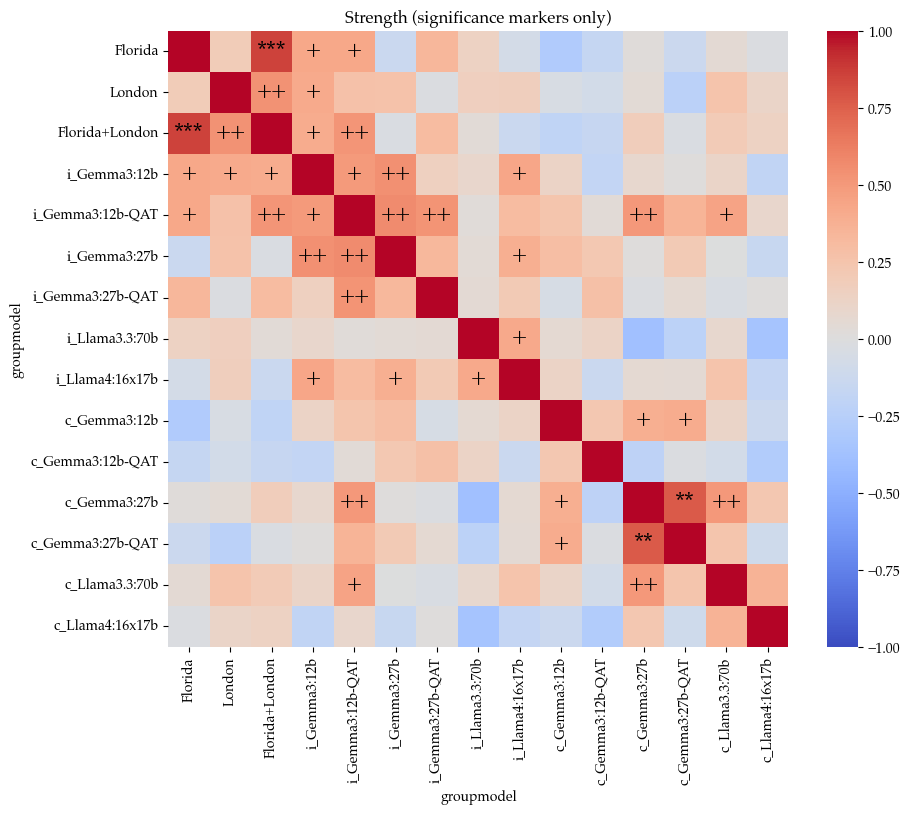

Saved assumption check + spearman results to: /Users/saurabh.ranjan/Library/CloudStorage/OneDrive-UniversityofFlorida/2020_2025_reality_monitoring_dissertation/osf-imagine/imagine_world_model/data/processed/assumption_checks_ps_strength.csv
--xx-- /Users/saurabh.ranjan/Library/CloudStorage/OneDrive-UniversityofFlorida/2020_2025_reality_monitoring_dissertation/osf-imagine/imagine_world_model/reports/figures/svg/network_analysis/ps_centrality_eg__closeness_annot.svg


/Users/saurabh.ranjan/Library/CloudStorage/OneDrive-UniversityofFlorida/2020_2025_reality_monitoring_dissertation/osf-imagine/imagine_world_model/imagine/funpair_corr_analysis.py:237: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  n_plus = annot_df.applymap(lambda s: isinstance(s, str) and s.startswith("+")).sum().sum()
/Users/saurabh.ranjan/Library/CloudStorage/OneDrive-UniversityofFlorida/2020_2025_reality_monitoring_dissertation/osf-imagine/imagine_world_model/imagine/funpair_corr_analysis.py:238: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  n_star = annot_df.applymap(lambda s: isinstance(s, str) and s.startswith("*")).sum().sum()


----xxxx---- /Users/saurabh.ranjan/Library/CloudStorage/OneDrive-UniversityofFlorida/2020_2025_reality_monitoring_dissertation/osf-imagine/imagine_world_model/reports/figures/svg/network_analysis/ps_centrality_eg__closeness_annot.svg


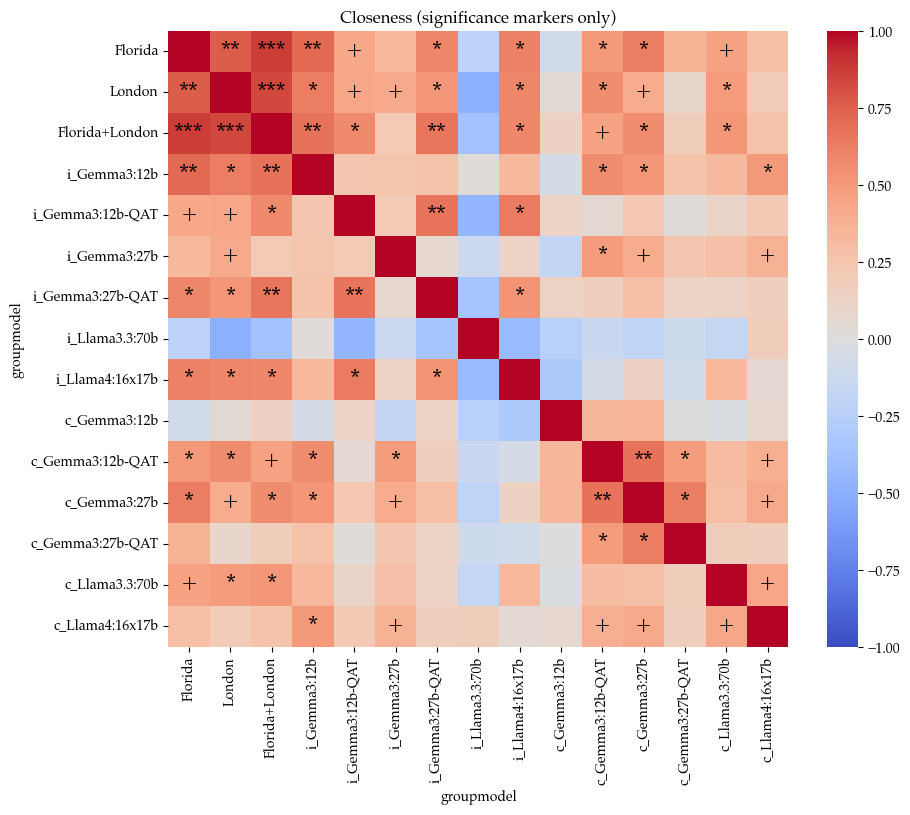

Saved assumption check + spearman results to: /Users/saurabh.ranjan/Library/CloudStorage/OneDrive-UniversityofFlorida/2020_2025_reality_monitoring_dissertation/osf-imagine/imagine_world_model/data/processed/assumption_checks_ps_closeness.csv
--xx-- /Users/saurabh.ranjan/Library/CloudStorage/OneDrive-UniversityofFlorida/2020_2025_reality_monitoring_dissertation/osf-imagine/imagine_world_model/reports/figures/svg/network_analysis/ps_centrality_eg__betweenness_annot.svg


/Users/saurabh.ranjan/Library/CloudStorage/OneDrive-UniversityofFlorida/2020_2025_reality_monitoring_dissertation/osf-imagine/imagine_world_model/imagine/funpair_corr_analysis.py:237: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  n_plus = annot_df.applymap(lambda s: isinstance(s, str) and s.startswith("+")).sum().sum()
/Users/saurabh.ranjan/Library/CloudStorage/OneDrive-UniversityofFlorida/2020_2025_reality_monitoring_dissertation/osf-imagine/imagine_world_model/imagine/funpair_corr_analysis.py:238: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  n_star = annot_df.applymap(lambda s: isinstance(s, str) and s.startswith("*")).sum().sum()


----xxxx---- /Users/saurabh.ranjan/Library/CloudStorage/OneDrive-UniversityofFlorida/2020_2025_reality_monitoring_dissertation/osf-imagine/imagine_world_model/reports/figures/svg/network_analysis/ps_centrality_eg__betweenness_annot.svg


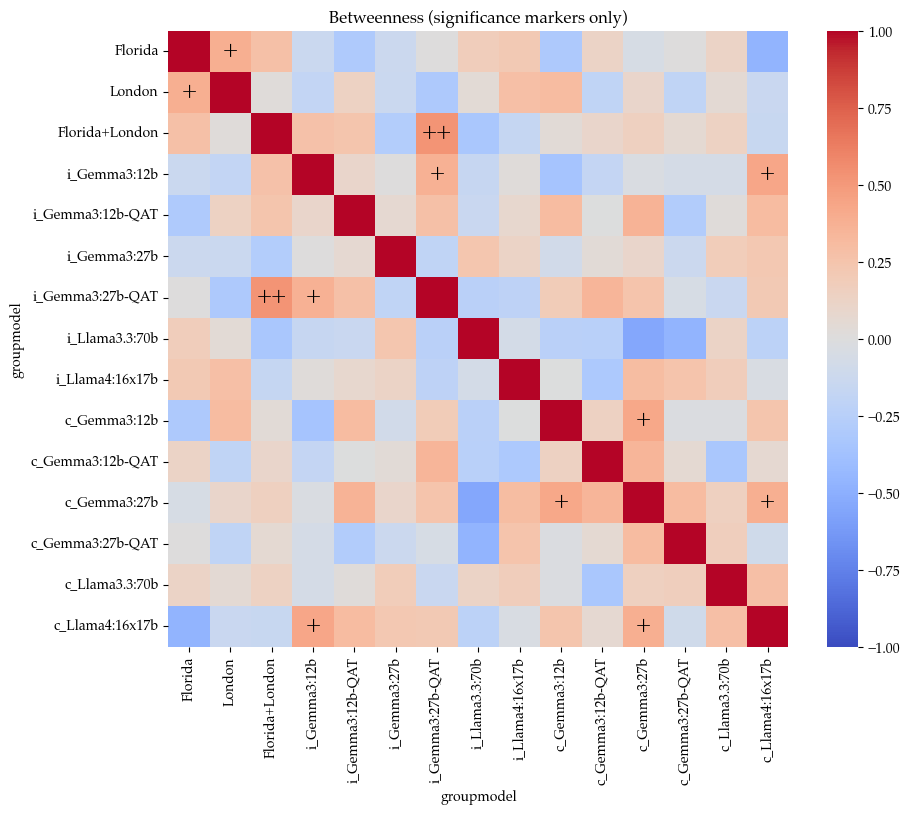

Saved assumption check + spearman results to: /Users/saurabh.ranjan/Library/CloudStorage/OneDrive-UniversityofFlorida/2020_2025_reality_monitoring_dissertation/osf-imagine/imagine_world_model/data/processed/assumption_checks_ps_betweenness.csv
Finished plotting all centrality measures and wrote per-measure assumption CSVs. Results stored in `vv_plot_results` and `ps_plot_results`.


In [71]:
# Optional: define a label_map to customize tick labels on the heatmaps (keys are groupmodel values)
# Example: map machine-generated groupmodel names to publication-ready labels

# Containers to hold results
vv_plot_results = {}
ps_plot_results = {}

# Ensure fig_out_dir exists (created earlier but safe-check)
fig_out_dir.mkdir(parents=True, exist_ok=True)

# Helper to save pivot tables with consistent names
def _save_pivot(prefix, measure, pivot):
    short = measure.replace(' ', '_').lower()
    fname = data_dir / f"{prefix}{short}_p.csv"
    pivot.to_csv(fname)
    return fname

# Run VVIQ measures (compute, plot, and write per-measure assumption CSV via module)
for measure in measures:
    res = analyze_measure(
        vv_centrality_eg,
        measure,
        vv_groups,
        "vv_centrality_eg_",
        fig_out_dir,
        padjust=padjust,
        corr_method=corr_method,
        label_map=label_map,
        font_family="Palatino",
        hypothesis=hypothesis,
    )
    vv_plot_results[measure] = res
    # save pivot in the same style as original code
    _save_pivot('vv_centrality_eg_', measure, res['pivot'])
    # run assumption analysis for this single measure (module will write CSV to data_dir)
    analyze_pairwise_assumptions({measure: res['pivot']}, label_prefix='vv', out_dir=data_dir, padjust=padjust, hypothesis=hypothesis)

# Run PSIQ measures (compute, plot, and write per-measure assumption CSV via module)
for measure in measures:
    res = analyze_measure(
        ps_centrality_eg,
        measure,
        ps_groups,
        "ps_centrality_eg_",
        fig_out_dir,
        padjust=padjust,
        corr_method=corr_method,
        label_map=label_map,
        font_family="Palatino",
        hypothesis=hypothesis,
    )
    ps_plot_results[measure] = res
    _save_pivot('ps_centrality_eg_', measure, res['pivot'])
    analyze_pairwise_assumptions({measure: res['pivot']}, label_prefix='ps', out_dir=data_dir, padjust=padjust, hypothesis=hypothesis)

print('Finished plotting all centrality measures and wrote per-measure assumption CSVs. Results stored in `vv_plot_results` and `ps_plot_results`.')
# Now also add the functionality to add the above figures as subplot.


In [72]:
# Run for VVIQ
vv_shapiro_columns = {}
vv_shapiro_pairs = {}
for measure in ['ExpectedInfluence', 'Strength', 'Closeness', 'Betweenness']:
    dfm = vv_centrality_eg.loc[vv_centrality_eg['measure'] == measure]
    pivot = dfm.pivot_table(index='node', columns='groupmodel', values='value')
    pivot = pivot  # no imputation here; Shapiro uses available values
    sh_cols = shapiro_per_column(pivot)
    sh_pairs = shapiro_pairwise_table(pivot, sh_cols)
    vv_shapiro_columns[measure] = sh_cols
    vv_shapiro_pairs[measure] = sh_pairs
    # save
    sh_cols.to_csv(data_dir / f"shapiro_vv_columns_{measure.replace(' ', '_').lower()}.csv", index=False)
    sh_pairs.to_csv(data_dir / f"shapiro_vv_pairs_{measure.replace(' ', '_').lower()}.csv", index=False)

# Run for PSIQ
ps_shapiro_columns = {}
ps_shapiro_pairs = {}
for measure in ['ExpectedInfluence', 'Strength', 'Closeness', 'Betweenness']:
    dfm = ps_centrality_eg.loc[ps_centrality_eg['measure'] == measure]
    pivot = dfm.pivot_table(index='node', columns='groupmodel', values='value')
    sh_cols = shapiro_per_column(pivot)
    sh_pairs = shapiro_pairwise_table(pivot, sh_cols)
    ps_shapiro_columns[measure] = sh_cols
    ps_shapiro_pairs[measure] = sh_pairs
    # save
    sh_cols.to_csv(data_dir / f"shapiro_ps_columns_{measure.replace(' ', '_').lower()}.csv", index=False)
    sh_pairs.to_csv(data_dir / f"shapiro_ps_pairs_{measure.replace(' ', '_').lower()}.csv", index=False)

# Combined tables
vv_shapiro_columns_combined = pd.concat([df.assign(measure=measure) for measure, df in vv_shapiro_columns.items()], ignore_index=True)
vv_shapiro_pairs_combined = pd.concat([df.assign(measure=measure) for measure, df in vv_shapiro_pairs.items()], ignore_index=True)
ps_shapiro_columns_combined = pd.concat([df.assign(measure=measure) for measure, df in ps_shapiro_columns.items()], ignore_index=True)
ps_shapiro_pairs_combined = pd.concat([df.assign(measure=measure) for measure, df in ps_shapiro_pairs.items()], ignore_index=True)

vv_shapiro_columns_combined.to_csv(data_dir / "shapiro_vv_columns_combined.csv", index=False)
vv_shapiro_pairs_combined.to_csv(data_dir / "shapiro_vv_pairs_combined.csv", index=False)
ps_shapiro_columns_combined.to_csv(data_dir / "shapiro_ps_columns_combined.csv", index=False)
ps_shapiro_pairs_combined.to_csv(data_dir / "shapiro_ps_pairs_combined.csv", index=False)

print('Saved Shapiro per-column and pairwise summary CSVs to data_dir')

# Expose some short names for convenience
vv_shapiro_expectedinfluence_columns = vv_shapiro_columns['ExpectedInfluence']
vv_shapiro_expectedinfluence_pairs = vv_shapiro_pairs['ExpectedInfluence']
ps_shapiro_expectedinfluence_columns = ps_shapiro_columns['ExpectedInfluence']
ps_shapiro_expectedinfluence_pairs = ps_shapiro_pairs['ExpectedInfluence']

# Show quick preview
print('\nVVIQ ExpectedInfluence (columns)')
display(vv_shapiro_expectedinfluence_columns.head())
print('\nVVIQ ExpectedInfluence (pairs)')
display(vv_shapiro_expectedinfluence_pairs.head())


Saved Shapiro per-column and pairwise summary CSVs to data_dir

VVIQ ExpectedInfluence (columns)


,column,n,shapiro_stat,shapiro_p,normal
0,cumulative_g12,32,0.980537,0.815070,True
1,cumulative_g12qt,32,0.834085,0.000191,False
2,cumulative_g27,32,0.947746,0.124352,True
3,cumulative_g27qt,32,0.979220,0.776601,True
4,cumulative_ll70,32,0.963013,0.331363,True



VVIQ ExpectedInfluence (pairs)


,X,Y,shapiro_x_p,shapiro_x_stat,n_x,normal_x,shapiro_y_p,shapiro_y_stat,n_y,normal_y
0,cumulative_g12,cumulative_g12qt,0.81507,0.980537,32,True,0.000191,0.834085,32,False
1,cumulative_g12,cumulative_g27,0.81507,0.980537,32,True,0.124352,0.947746,32,True
2,cumulative_g12,cumulative_g27qt,0.81507,0.980537,32,True,0.776601,0.979220,32,True
3,cumulative_g12,cumulative_ll70,0.81507,0.980537,32,True,0.331363,0.963013,32,True
4,cumulative_g12,cumulative_llsc,0.81507,0.980537,32,True,0.645657,0.974959,32,True


In [73]:
vv_shapiro_expectedinfluence_pairs["shapiro_pass"] = vv_shapiro_expectedinfluence_pairs["normal_x"] & vv_shapiro_expectedinfluence_pairs["normal_y"]

In [74]:
vv_shapiro_expectedinfluence_pairs

,X,Y,shapiro_x_p,shapiro_x_stat,n_x,normal_x,shapiro_y_p,shapiro_y_stat,n_y,normal_y,shapiro_pass
0,cumulative_g12,cumulative_g12qt,0.815070,0.980537,32,True,0.000191,0.834085,32,False,False
1,cumulative_g12,cumulative_g27,0.815070,0.980537,32,True,0.124352,0.947746,32,True,True
2,cumulative_g12,cumulative_g27qt,0.815070,0.980537,32,True,0.776601,0.979220,32,True,True
3,cumulative_g12,cumulative_ll70,0.815070,0.980537,32,True,0.331363,0.963013,32,True,True
4,cumulative_g12,cumulative_llsc,0.815070,0.980537,32,True,0.645657,0.974959,32,True,True
...,...,...,...,...,...,...,...,...,...,...,...
131,pl1_human,pl_human,0.668476,0.975697,32,True,0.571948,0.972529,32,True,True
132,pl1_human,plfl_human,0.668476,0.975697,32,True,0.523667,0.970867,32,True,True
133,pl2_human,pl_human,0.673937,0.975873,32,True,0.571948,0.972529,32,True,True
134,pl2_human,plfl_human,0.673937,0.975873,32,True,0.523667,0.970867,32,True,True
